In [1]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd
from pydataset import data

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Sklearn Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


# Sklearn Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.cluster import KMeans


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate
from sklearn.tree import export_graphviz

# Custom Module's
from wrangle import wrangle
from acquire import acquire, get_target, get_data_dictionary

import warnings
warnings.filterwarnings("ignore")

# Project Planning

### Project and Goals

### Original Hypothesis

Creating linear regression models by using clusters as features will idenify which features are important to predicting zillow homes.

### The Plan

#### Setup

- Create a repo
- Create a README.md
- Update .gitignore
- Create a draft and final in juypter notebook

#### Acquire

- Create an acquire.py module
- Create a sql script
- Setup acquire.py
- Use python/sql to grab the data from codeup database
- plot distributions
- Run .head(), .info(), .describe()

#### Prepare

- Create a prepare.py module

- Clean data()
   - Drop columns
       - Document why I dropped columns
   - Handle nulls
       - Documnet which columns/rows will be dropped.
       - Impute? document how and why
   - Check datatypes
   - Check for duplicates
   - Rename columns
   
- Remove outliers()
    
- Split Data for modeling()
    - Encode()
        - Create dummies
        - Scale Data on Train
        - Transform Train, Validate, Test
        
- Split Data for exploration()
    - No encoding
    
#### Explore

- Ask and answer as many questions as i can
- Create a Heatmap
- Convert some continous values to categorical
- Look at univariate graphs and bivariate graphs
- Create initial hypothesis
- Run some hypothesis testing
    - T-Test
    - Correlation
- Feature Engineering
- Clustering
    - Try out different features
        - Graph clusters
        - graph k using inertia

#### Model
- If clusters found, use cluster as features or For each cluster
    - Run as many linear regression models as i can.
        - Change out features
            - Document
        - Change out hyperparameters
            - Document
    - Select best model
         - Compare Validate and Train rmse and look for drop offs
         - plot residuals
    - Run test
    
#### Deliver
- Create a data dictionary
- Finish up final notebook
- Finish up READ.me

# Executive Summary - Conclusions & Next Steps

### Conclusion

My OLS model RMSE did <b>not</b> beat my baseline RMSE by .0071.

The 5 clusters I found did not help identify drivers for logerror.  

If I had more time, I would have liked to explore the data further and look for new features. I would have liked to spend more time with the clustered I found.  I would have also liked to iterate through hyperparameters during modeling.

### Recommendation

- Fill in more of the missing data
- Add more features about the house like:<br> 
how far from shopping centers, highways, schools, or airports? 
is it a fixer upper?
is in a hoa?
garage size?

### Takeaways

Look at clusters more closely, look at inheria, 
    

# Data Acquisition

In [2]:
df = acquire()

### .info(), .head(), .describe()

In [3]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,transactiondate,id,...,censustractandblock,id.1,logerror,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,2017-01-01,1727539,...,6.059063e+13,0,0.025595,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,2017-01-01,1387261,...,6.111001e+13,1,0.055619,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,2017-01-01,11677,...,6.059022e+13,2,0.005383,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2017-01-01,2288172,...,6.037300e+13,3,-0.103410,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,2017-01-01,1970746,...,6.037124e+13,4,0.006940,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 0 to 77380
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77381 non-null  float64
 3   heatingorsystemtypeid         49440 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      206 non-null    float64
 6   airconditioningtypeid         24953 non-null  float64
 7   parcelid                      77381 non-null  int64  
 8   transactiondate               77381 non-null  object 
 9   id                            77381 non-null  int64  
 10  basementsqft                  50 non-null     float64
 11  bathroomcnt                   77381 non-null  float64
 12  bedroomcnt                    77381 non-null  float64
 13  b

### Distributions - "calculatedfinishedsquarefeet", "lotsizesquarefeet", "bedroomcnt", "taxamount", "landtaxvaluedollarcnt"

<AxesSubplot:>

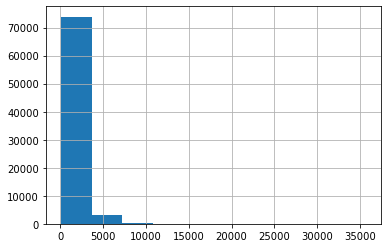

In [5]:
df.calculatedfinishedsquarefeet.hist()

<AxesSubplot:>

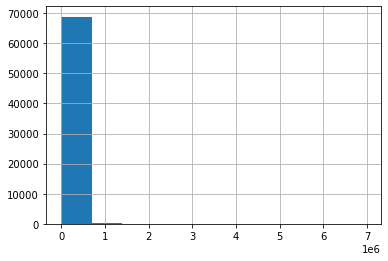

In [6]:
df.lotsizesquarefeet.hist()

<AxesSubplot:>

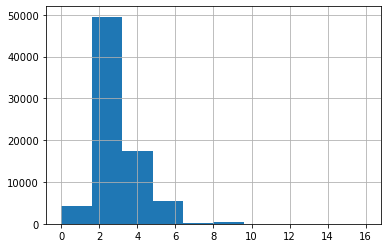

In [7]:
df.bedroomcnt.hist()

<AxesSubplot:>

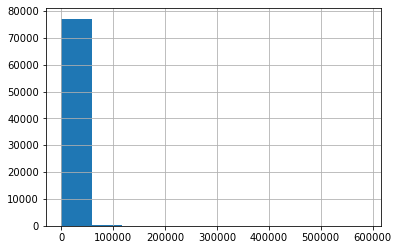

In [8]:
df.taxamount.hist()

<AxesSubplot:>

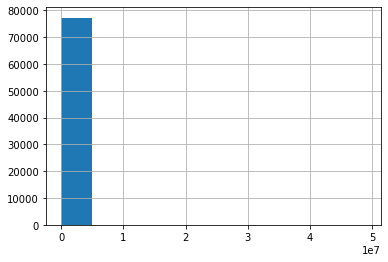

In [9]:
df.landtaxvaluedollarcnt.hist()

### Target Feature - "logerror"

In [10]:
print(get_target(df).to_markdown())

|             | Target                                        |
|:------------|:----------------------------------------------|
| Feature     | logerror                                      |
| Datatype    | 77381 non-null: float64                       |
| Description | Error rate of acutal price vs predicted price |


<AxesSubplot:>

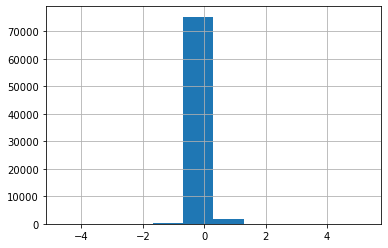

In [11]:
df.logerror.hist()

### Data Dictionary

In [12]:
print(get_data_dictionary(df).to_markdown())

| Feature                      | Datatype                | Description                                   |
|:-----------------------------|:------------------------|:----------------------------------------------|
| typeconstructiontypeid       | 222 non-null: float64   |                                               |
| storytypeid                  | 50 non-null: float64    |                                               |
| propertylandusetypeid        | 77381 non-null: float64 |                                               |
| heatingorsystemtypeid        | 49440 non-null: float64 |                                               |
| buildingclasstypeid          | 15 non-null: float64    |                                               |
| architecturalstyletypeid     | 206 non-null: float64   |                                               |
| airconditioningtypeid        | 24953 non-null: float64 |                                               |
| parcelid                     | 7738

### Data Acquisition Takeaways

Brought in roughly 77k observations and 69 features from the codeup zillow database.  These observations where filtered from 2017 properties table where the latitude and longitude were not null.  I also included only the last transaction for each property. 
   

# Data Preparation

### Clean()

Created a feature called county where it mapped out the county from the fips feature.

Using propertylandusedesc I was able to filter out only single family residentails.

Removed columns that were missing 60% of its values.

Removed rows that were missing 75% of its values.

Any row claiming ot have a unitcnt great than 1 was removed.

From heaters feature, I removed any observation that wasn't Central, Floor/Wall, or Forced air

Renamed columns

### Outlier()

I removed extreme outliers by county.  I only removed outliers on these three features as I wanted to keep as many houses as possible.  
price_per_sqft

lot_size

tax_value

### Scaled()

I used a MinMaxScaler() on columns:

- bath
- bed
- area
- lot_size
- year
- tax_amount
- tax_value

### Split()

In [13]:
train, validate, test = wrangle()

In [14]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (28210, 29)
validate -> (12090, 29)
test -> (10075, 29)


### Data Preperation Takeaways

All observations have no null or empty values.  Ended the prep stage with only 12 features.  Data is split between train, validate, and test.

# Data Exploration & Analysis

### Original Hypothesis

Creating linear regression models by using clusters as features will idenify which features are important to predicting zillow homes.

## Explore

I started off by asking simple questions to get an idea of what kind of findings I could make of the data. Questions like:

What county on average has a  logerror?<br>
Which county has the largest tax value houses?<br>
Which what is range of lot_size per county?<br>

Through making graphs and looking at the numbers I eventually ran into extreme outliers and I went back and forth between cleaing and my exploration.

I found that price_per_sqft per county were very unique. I decided to run a T-Test to compare means just to be sure these values did not happen by chance. 

In [15]:
# insert price_per_sqft graph here

### Hypotheses 1

$H_{0}$: population means of the price per square feet for the three counties, Orange, Ventura & Los Angeles, are all equal.  

$H_{a}$: population means of the price per square feet for the three counties, Orange, Ventura & Los Angeles, are NOT all equal. 

In [16]:
alpha = .05

In [17]:
# Filtering by county
orange_mean = train[train['county']=='Orange'].price_per_sqft
ventura_mean = train[train['county']=='Ventura'].price_per_sqft
la_mean = train[train['county']=='Los Angeles'].price_per_sqft

### Checking distributions

<AxesSubplot:>

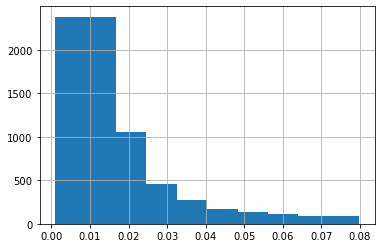

In [18]:
orange_mean.hist()

<AxesSubplot:>

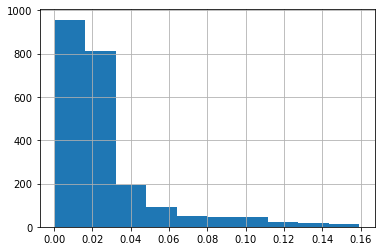

In [19]:
ventura_mean.hist()

<AxesSubplot:>

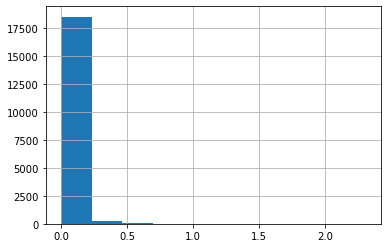

In [20]:
la_mean.hist()

In [21]:
# Using a non parametric test
f, p = stats.kruskal(orange_mean, ventura_mean, la_mean)
f, p

(2850.6866668943026, 0.0)

In [22]:
if p < alpha:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We reject Null Hypothesis


### Hypothesis 1 Take away

Population means of the price per square feet for the three counties, Orange, Ventura & Los Angeles, are NOT all equal.  I found that price_per_sqft would be useful in creating clusters.

### Clustering

In clustering I used the following features:

- lat
- long
- price_per_sqft
- area

I ended up with 5 clusters labeled as:
- cluster0
- cluster1 
- cluster2
- cluster3
- cluster4

In [23]:
# insert cluster graph here

I wanted to make sure my clusters had different logerror because if they have the same logerror the clusters wouldn't be useful in finding drivers of logerror, so I ran a t-test on each to be sure.

### Hypothesis 2

$H_0$ There is no difference in cluster0 logerror mean than the overall logerror mean<br>
$H_a$ There is a difference in cluster0 logerror mean than the overall logerror mean

In [24]:
# Logerror of cluster0
log_error_cluster0 = train[train.cluster ==0].logerror

# Mean Logerror of all values in train
μ = train.logerror.mean()

t, p = stats.ttest_1samp(log_error_cluster0, μ)
t, p

(-0.3473320198300476, 0.7283789248815163)

In [25]:
if (p < alpha):
    print("reject Null Hypothesis")
elif((t < 0)):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

Reject Null Hypothesis


### Hypothesis Take away

There is a difference in cluster0 logerror mean than the overall logerror mean.  The same was true for all clusters.

### Explore Takaways

Cluster0 

- Smallest cluster
- Only in LA area
- median price of 184K
- median lot_size of 7509 sq ft
- median area of 1716 sq feet
- 3 bed
- 2 bath

Cluster1 

- Largest cluster
- Mostly in LA area
- median price of 311K
- median lot_size of 6300 sq ft
- median area of 1423sq feet
- 3 bed
- 2 bath

Cluster2 

- Mostly in Ventura area
- median price of 460K
- median lot_size of 7506 sq ft
- median area of 1924 sq feet
- 4 bed
- 2.5 bath

Cluster3 

- Mostly in LA area
- median price of 458K
- median lot_size of 7464 sq ft
- median area of 1764 sq feet
- 3 bed
- 2 bath

Cluster4

- Mostly in Orange County
- median price of 541K
- median lot_size of 6083 sq ft
- median area of 1988 sq feet
- 3 bed
- 2.5 bath



# Modeling and Evaluation

In [26]:
train, validate, test = wrangle()

### Target

In [27]:
y_train = train['logerror']
y_train  = pd.DataFrame(y_train)

y_validate = validate['logerror']
y_validate  = pd.DataFrame(y_validate)

y_test = test['logerror']
y_test  = pd.DataFrame(y_test)

### Baseline

In [28]:
# Using the mean and not the median
# target is logerror

mean = y_train.logerror.mean()

y_train["logerror_pred_mean"] = mean

rmse_baseline = round(mean_squared_error(y_train.logerror, y_train.logerror_pred_mean) ** .5, 5)

rmse_baseline

0.17253

### Feature Engineering

### RFE

### Models - linear regression

I used Ordinary Least Squares, LASSO + LARS, and Polynomial Regression to create over 50+ Models.  I used many different combinations of these features in those models: 

'area'
'lot_size'
'tax_amount'
'tax_value'
'bed'
'bath'
'year'
'lat'
'long'
'cluster_0'
'cluster_1'
'cluster_2'
'cluster_3'
'cluster_4'


If you want to see more about the models refer to the model_scratch jupyter notebook

### Modeling Take Away

No RMSE Validate beat my basline goal of .17253

The best RMSE on Validate was 0.17268 using a Ordinary Least Squares model.  I will move forward with this model on the test dataset that my model has not seen yet.

### Test My Best Model

In [29]:
# Train
X_train = train[['bed_scaled','bath_scaled','tax_amount_scaled','cluster_0', 'cluster_2', 'cluster_3']]
y_train = train['logerror']

# Validate
X_validate = validate[['bed_scaled', 'bath_scaled','tax_amount_scaled','cluster_0', 'cluster_2', 'cluster_3']]
y_validate = validate['logerror']

# Test
X_test = test[['bed_scaled', 'bath_scaled','tax_amount_scaled','cluster_0', 'cluster_2', 'cluster_3']]
y_test =  test['logerror']

In [31]:
y_train = train['logerror']
y_train  = pd.DataFrame(y_train)

y_validate = validate['logerror']
y_validate  = pd.DataFrame(y_validate)

y_test = test['logerror']
y_test  = pd.DataFrame(y_test)

### Test Model - OLS

In [32]:
# Make the model
lm = LinearRegression(normalize=True)

# Target to variable
target = y_train.columns[0]

# Fit the model
lm.fit(X_train, y_train[target])

# Use the model

# Train
y_train[target+'_pred_lm'] = lm.predict(X_train)
rmse_train = mean_squared_error(y_train[target], y_train[target+'_pred_lm']) ** (1/2)

# Validate
y_validate[target+'_pred_lm'] = lm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate[target], y_validate[target+'_pred_lm']) ** (1/2)

# Test
y_test[target+'_pred_lm'] = lm.predict(X_test)
rmse_test = mean_squared_error(y_test[target], y_test[target+'_pred_lm']) ** (1/2)

rmse_test

0.17963171754470317

### Test take away

In [49]:
print(f'baseline: {round(rmse_baseline, 5)}\n\nTrain:    {round(rmse_train, 5)}\nValidate: {round(rmse_validate, 5)}\nTest:     {round(rmse_test, 5)}')

baseline: 0.17253

Train:    0.17224
Validate: 0.17268
Test:     0.17963


In [38]:
round(rmse_baseline - rmse_test, 5)

-0.0071

My test performed worse than my train and validate on unseen data.

My test didn't beat my baseline by .0071

# Conclusion

My OLS model RMSE did <b>not</b> beat my baseline RMSE by .0071.

The 5 clusters I found did not help identify drivers for logerror.  

If I had more time, I would have liked to explore the data further and look for new features. I would have liked to spend more time with the clustered I found.  I would have also liked to iterate through hyperparameters during modeling.


# Thank You

In [ ]:
Executive Summary
project goals
Graphs
ReadMe
Formatting 